In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [2]:
# 허프 변환 = 어떠한 모양의 객체도 탐지할 수 있는 기술
# ex) 자율 주행에서 차선 검출, 수평이 맞지 않는 영상에서
# 수평선 또는 수직선 성분을 찾아내어 자동 영상 회전을 위한
# 정보로 사용할 수도 있음


In [4]:
# 직선 탐지
# 영상에서 직선 성분을 찾으려면 = 에지 찾고, 에지 픽셀들이
# 일직선상에 배열되어 있는지 확인해야 함

# y=ax+b -> b = -xa+y
# xy공간에서 직선은 ab공간에서 한 점으로 표현되고,
# xy공간에서 한 점은 ab 공간에서 직선의 형태로 나타난다

# but, y=ax+b는 표현의 한계가 있음 = 수직 표현 불가!!
# 그래서 극좌표계 형식의 직선 방정식을 사용
# ρ=xcosθ+ysinθ



29 [[361.          1.5707964]]


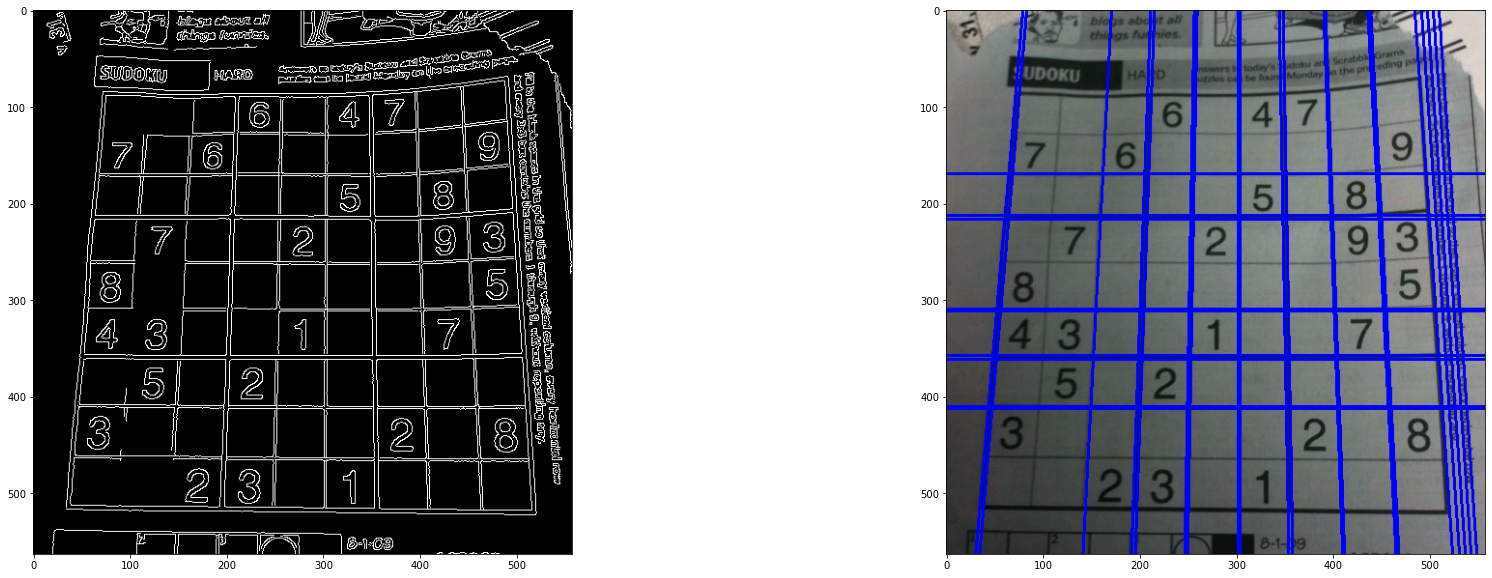

In [28]:
img = cv.imread('../samples/sudoku.png')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,200)
print(len(lines), lines[0])

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.rcParams["figure.figsize"] = (30,10)
plt.subplot(121); plt.imshow(edges, cmap='gray')
plt.subplot(122); plt.imshow(img, cmap='gray')

14 [[355.          1.1693705]]


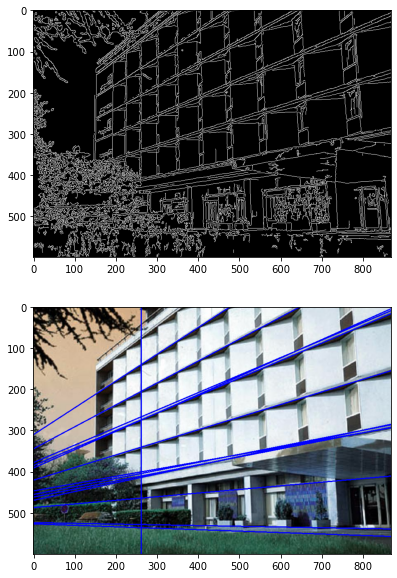

In [37]:
img = cv.imread('../samples/building.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)

# 축적 배열에서 ρ의 간격은 1픽셀 단위로, θ단위는 1도 단위로 설정
lines = cv.HoughLines(edges, 1, np.pi/180, 250)
print(len(lines), lines[0])

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.rcParams["figure.figsize"] = (30,10)
plt.subplot(211); plt.imshow(edges, cmap='gray')
plt.subplot(212); plt.imshow(img, cmap='gray')

41


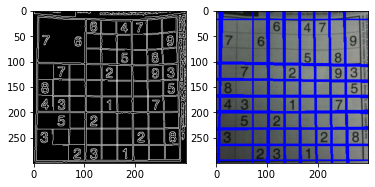

In [24]:
# QUIZ: Affine 변환 후 Line 탐지를 해 봅시다
img = cv.imread('../samples/sudoku.png')
rows, cols, ch = img.shape

pts1 = np.float32([[60,70],[520,52],[28,520],[540,530]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))

gray = cv.cvtColor(dst, cv.COLOR_BGR2GRAY)

# binary image, ρ, θ, threshold
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edges, 1, np.pi/180, 130)
print(len(lines))

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(dst,(x1,y1),(x2,y2),(0,0,255),2)

    
plt.subplot(121); plt.imshow(edges, cmap='gray')
plt.subplot(122); plt.imshow(dst, cmap='gray')

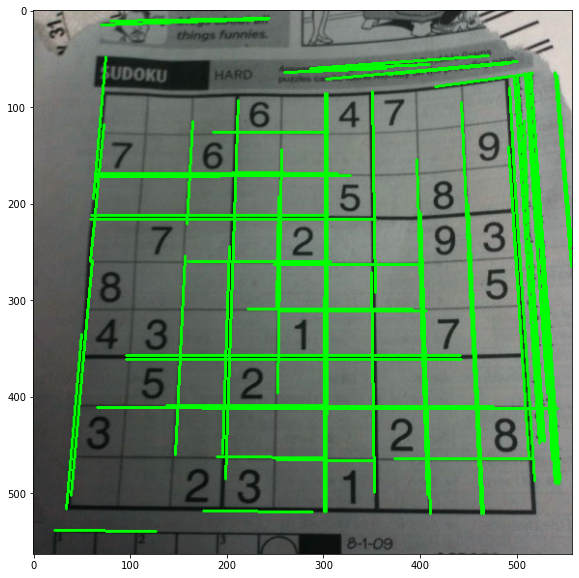

In [40]:
# 확률적 허프 변환: 허프 변환을 최적화 한 것으로, ρ와 θ가 아닌
# 직선의 시작점과 끝점 좌표를 반환
# 모든 점을 고려하지 않고, 라인 탐지에 충분한 정도의 점을 랜덤으로 선택


img = cv.imread('../samples/sudoku.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(img, (x1,y1), (x2,y2) ,(0,255,0),2)

plt.imshow(img)

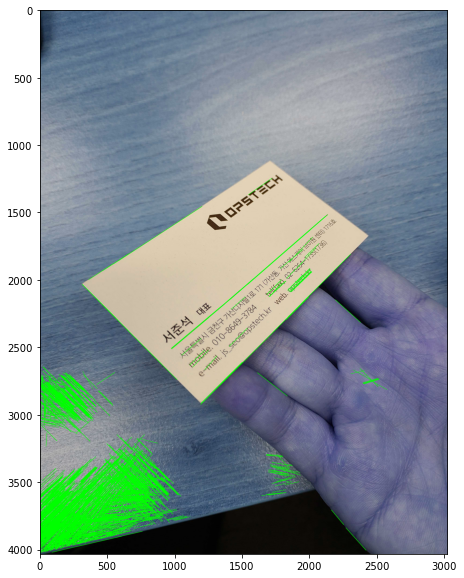

In [43]:

img = cv.imread('../samples/card.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)

# minLineLength: 라인 최소 길이
# maxLineGap: 라인 사이의 최대 간격
lines = cv.HoughLinesP(edges,1,np.pi/180,200,minLineLength=100,maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(img, (x1,y1), (x2,y2) ,(0,255,0),2)

plt.imshow(img)

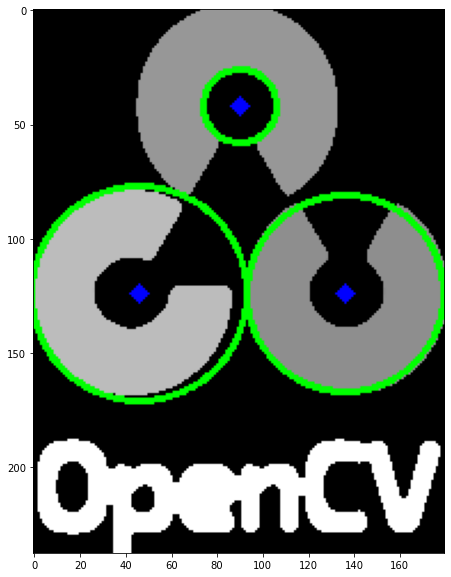

In [46]:
# 허프 변환을 이용한 원 검출
# (x - a)^2 + (y - b)^2 = r^2
# 원 검출을 위해 파라미터가 세 개가 필요 = 3차원 누적 배열 = 비효율적
# 그래서 보통 허프 그래디언트 방법을 더 많이 사용함!

img = cv.imread('../samples/opencv-logo-white.png',0)
img = cv.medianBlur(img,5)

cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

# param1: Canny 에지 검출기의 높은 임계값
# param2: 축적 배열에서 원 검출을 위한 임계값, 축적 배열은 허프 변환을 통해 만들어진 배열
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(cimg)

In [ ]:
# 테스트: smarties.png